***DESCRIPTIVE STATISTICS***

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats

import warnings 
warnings.filterwarnings('ignore')

import yfinance as yf

In [150]:
stock = 'RELIANCE.NS'
start = '2020-01-01'
end = '2025-01-01'

dataset = yf.download(stock, start, end)
dataset.columns = dataset.columns.get_level_values(0)
dataset.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,682.636536,690.549999,680.782581,686.435003,14004468
2020-01-02,694.257996,696.812926,683.721805,683.721805,17710316
2020-01-03,695.094604,697.129493,688.695988,693.217950,20984698
2020-01-06,678.973755,690.911716,677.391050,687.339402,24519177
2020-01-07,689.419495,693.896238,684.400070,686.887143,16683622


In [151]:
dataset.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-12-24,1222.750000,1233.550049,1221.000000,1222.300049,6734917
2024-12-26,1216.550049,1227.699951,1214.250000,1224.250000,10016178
2024-12-27,1221.050049,1227.900024,1217.000000,1218.300049,7000397
2024-12-30,1210.699951,1223.199951,1208.099976,1216.400024,8818766
2024-12-31,1215.449951,1219.099976,1206.150024,1208.000000,6405475


In [152]:
sample = round(dataset['Close'], 2)
sample.tail()

Date
2024-12-24    1222.75
2024-12-26    1216.55
2024-12-27    1221.05
2024-12-30    1210.70
2024-12-31    1215.45
Name: Close, dtype: float64

In [153]:
print('Sample Statistics:')
print('Sample Mean: ', sample.mean())
print('Sample Variance: ', sample.var())
print('Sample Standarad Deviation: ', sample.std())
print('Sample Median: ', np.median(sample))
print('Sample Mode: ', stats.mode(sample, keepdims=True).mode[0] )


Sample Statistics:
Sample Mean:  1108.81147819063
Sample Variance:  53370.21345254237
Sample Standarad Deviation:  231.01994167721185
Sample Median:  1129.9699999999998
Sample Mode:  875.96


In [154]:
#percentiles

p = np.percentile(sample, 50)
print('Sample percentile of 50th: ', p)

Sample percentile of 50th:  1129.9699999999998


In [155]:
#Quartiles

sample.quantile([0.25, 0.5, 0.75])

0.25     965.740
0.50    1129.970
0.75    1232.445
Name: Close, dtype: float64

In [156]:
#range

print('Range: ', sample.max() - sample.min())

Range:  1195.72


In [157]:
#interquartile range

from scipy.stats import iqr

print('Interquartile range (IQR): ', iqr(sample))

Interquartile range (IQR):  266.7049999999999


In [158]:
#harmonic mean

print('Sample Harmonic mean: ', stats.hmean(sample))

Sample Harmonic mean:  1049.3587039647493


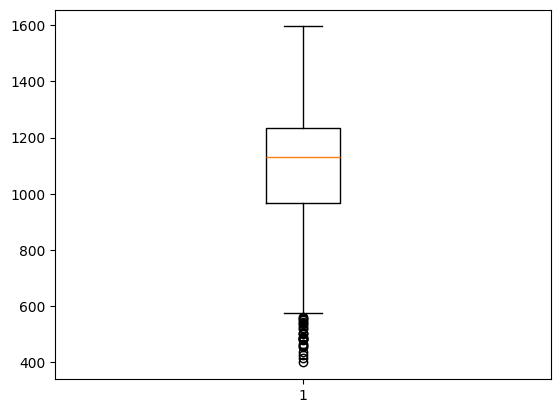

In [159]:
plt.boxplot(sample)
plt.show()

In [160]:
#calculate summary statistics
data_mean, data_std = sample.mean(), sample.std()

#identify outliers
cutoff = data_std * 3
lower, upper = data_mean - cutoff, data_mean + cutoff

#identify outliers
outliers = [x for x in sample if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

#remove outliers
outliers_removed = [x for x in sample if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 2
Non-outlier observations: 1236


In [161]:
q25, q75 = np.percentile(sample, 25), np.percentile(sample, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in sample if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in sample if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=965.740, 75th=1232.445, IQR=266.705
Identified outliers: 27
Non-outlier observations: 1211


In [162]:
print('Skewness: ', sample.skew())

Skewness:  -0.4088563891639537


In [163]:
print('Five_number Summary: ')
print(sample.describe())

Five_number Summary: 
count    1238.000000
mean     1108.811478
std       231.019942
min       399.760000
25%       965.740000
50%      1129.970000
75%      1232.445000
max      1595.480000
Name: Close, dtype: float64


In [164]:
print("Z-Score: ", stats.zscore(sample))

Z-Score:  [-1.84548442 -1.79516541 -1.79157119 ...  0.48603544  0.44121601
  0.46178532]


In [165]:
print('Coefficient of Variation: ', stats.variation(sample))

Coefficient of Variation:  0.20826499696115486


{'whiskers': [<matplotlib.lines.Line2D at 0x1bc3512fad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc3513c0b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc3512f890>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc3513c620>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc3513c8f0>],
 'means': []}

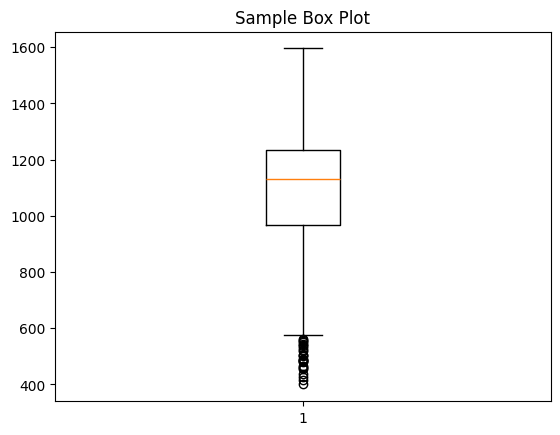

In [166]:
fig1, ax1 = plt.subplots()
ax1.set_title('Sample Box Plot')
ax1.boxplot(sample)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc34f27500>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc34f25af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc34f24200>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc33cdbe60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc34e9d790>],
 'means': []}

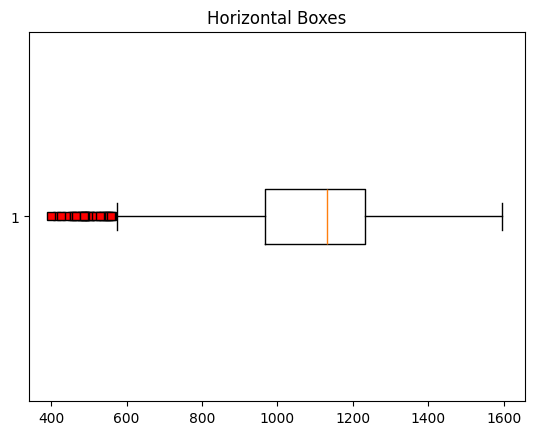

In [167]:
red_square = dict(markerfacecolor = 'r', marker  = 's')
fig2, ax2 = plt.subplots()
ax2.set_title('Horizontal Boxes')
ax2.boxplot(sample, vert = False, flierprops = red_square)

In [168]:
print('Empirical Rule: ')
final_list = [x for x in sample if (x > sample.mean() - 2*sample.std())]
final_list = [x for x in final_list if (x < sample.mean() + 2*sample.std())]
print(final_list)

Empirical Rule: 
[682.64, 694.26, 695.09, 678.97, 689.42, 684.24, 700.0, 699.84, 698.06, 691.59, 689.08, 695.43, 714.92, 692.92, 693.62, 693.38, 690.44, 688.04, 681.26, 665.52, 669.18, 652.86, 655.01, 659.21, 648.29, 649.17, 656.93, 664.87, 666.61, 672.69, 668.46, 663.55, 680.01, 671.94, 653.4, 662.92, 648.99, 660.5, 660.55, 681.44, 706.24, 713.02, 668.91, 683.1, 655.49, 666.19, 657.68, 654.46, 657.91, 653.48, 650.06, 659.87, 672.06, 668.47, 694.01, 701.02, 703.74, 721.15, 722.02, 716.45, 701.68, 717.66, 701.93, 725.26, 737.02, 738.45, 737.38, 755.89, 803.14, 797.09, 785.56, 788.73, 784.19, 795.03, 786.59, 777.89, 793.19, 806.84, 819.47, 848.76, 835.76, 824.1, 836.13, 860.79, 886.89, 878.64, 845.18, 844.91, 876.21, 879.97, 903.64, 918.52, 943.17, 983.67, 988.27, 998.13, 960.98, 966.57, 947.44, 920.81, 985.71, 974.64, 978.15, 983.81, 971.61, 978.01, 975.17, 972.62, 968.84, 958.55, 971.02, 976.98, 961.16, 954.2, 960.57, 954.31, 979.61, 967.37, 969.92, 953.67, 956.67, 975.44, 968.06, 952.

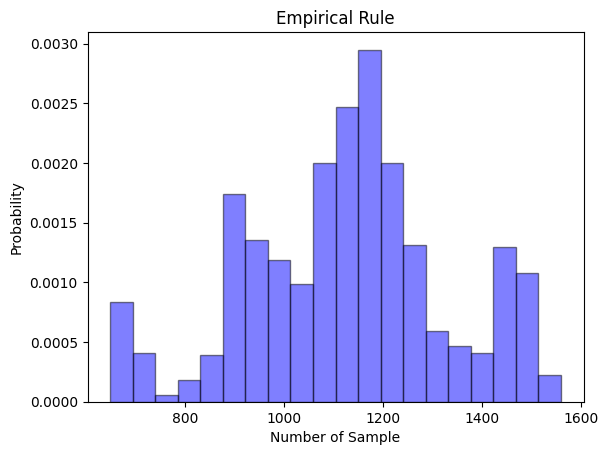

In [169]:
plt.hist(final_list, 20,
         density = True,
         histtype='bar',
         facecolor = 'b',
         edgecolor = 'k',
         alpha = 0.5)
plt.title ('Empirical Rule')
plt.xlabel('Number of Sample')
plt.ylabel('Probability')
plt.show()

Mean:  1108.81147819063 
Median:  1129.9699999999998 
Mode:  875.96


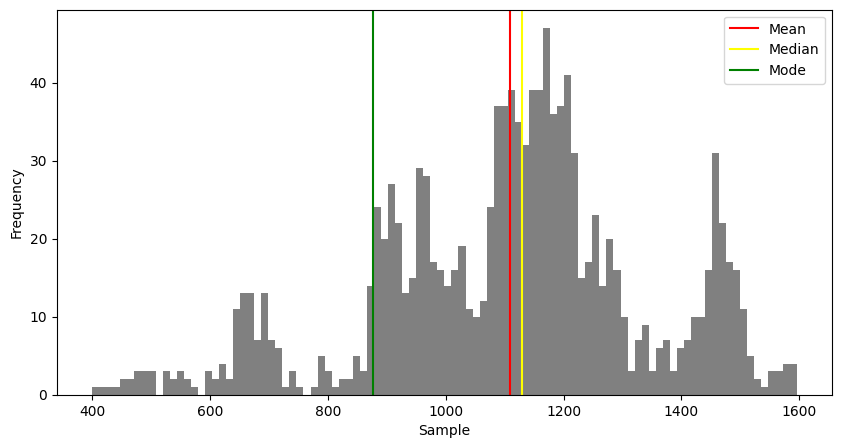

In [170]:
mean = sample.mean()
median = sample.median()
mode = sample.mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
plt.figure(figsize=(10,5))
plt.hist(sample,bins=100,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.legend()
plt.show()

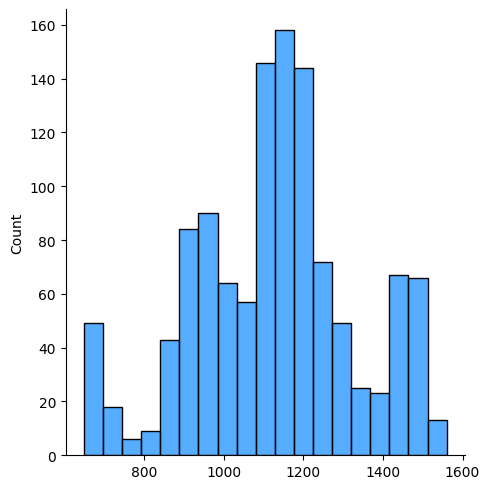

In [171]:
import seaborn as sns

sns.displot(final_list, color = 'dodgerblue')

In [172]:
#convert pandas dataframe object to numpy array and sort
h = np.asarray(sample)
h = sorted(h)

In [173]:
#use the scipy stats module to fit a normal distribution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

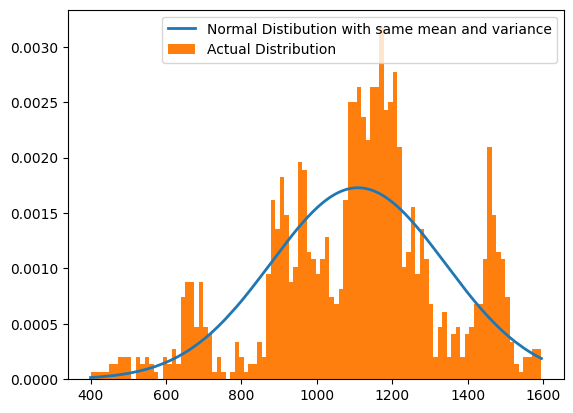

In [174]:
#plot both series on the histogram

plt.plot(h, fit, '-', linewidth = 2, label = 'Normal Distibution with same mean and variance')
plt.hist(h, density = True, bins = 100, label = 'Actual Distribution')
plt.legend()
plt.show()

In [177]:
#ordinary least square
from statsmodels.formula.api import ols

mlr = ols('Close ~ Open + High + Low + Volume', dataset).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.340e+05
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:21:50   Log-Likelihood:                -3877.6
No. Observations:                1238   AIC:                             7765.
Df Residuals:                    1233   BIC:                             7791.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7906      1.021      0.774      0.4

In [178]:
#one sample t-test
from scipy.stats import ttest_1samp

sample_mean = np.mean(sample)
print('Sample Mean: ', sample_mean)
tset, pva1 = ttest_1samp(sample, 8)

print('P-value: ', pva1)
if pva1 < 0.05: 
    print('Reject null hypothesis.')
else:
    print('Accept null hypothesis.')

Sample Mean:  1108.81147819063
P-value:  0.0
Reject null hypothesis.


In [179]:
#two sampled T-test

from scipy.stats import ttest_ind

low_mean = np.mean(dataset['Low'])
high_mean = np.mean(dataset['High'])
print('Low mean value: ', low_mean)
print('High mean value: ', high_mean)

low_std = np.std(dataset['Low'])
high_std = np.std(dataset['High'])
print('Week 1 std value: ', low_std)
print('Week 2 std value: ', high_std)

ttest, pval = ttest_ind(dataset['Low'], dataset['High'])
print('P-value: ', pval)

if pval < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Accept the null hypothesis.")

Low mean value:  1097.8081496892241
High mean value:  1120.8752436334232
Week 1 std value:  230.55105314504135
Week 2 std value:  231.1283211715974
P-value:  0.013015448457305859
Reject the null hypothesis.
